In [1]:
from keras import Input
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Conv2DTranspose
from keras.layers.merge import concatenate
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import imageio
import glob

inputs = Input((256,256,1))

# down branch

c11 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(inputs)
c12 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(c11)
p1 = MaxPool2D((2,2))(c12)

c21 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(p1)
c22 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(c21)
p2 = MaxPool2D((2,2))(c22)

c31 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(p2)
c32 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(c31)
p3 = MaxPool2D((2,2))(c32)

c41 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(p3)
c42 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(c41)
p4 = MaxPool2D((2,2))(c42)

c51 = Conv2D(1024, (3,3), activation = 'relu', padding = 'same')(p4)
c52 = Conv2D(1024, (3,3), activation = 'relu', padding = 'same')(c51)

# Upbranch

u61 = Conv2DTranspose(512, (3,3), strides=(2,2), padding = 'same')(c52)
u62 = concatenate([u61, c42])
u63 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(u62)
u64 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(u63)

u71 = Conv2DTranspose(256, (3,3), strides=(2,2), padding = 'same')(u64)
u72 = concatenate([u71, c32])
u73 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(u72)
u74 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(u73)

u81 = Conv2DTranspose(128, (3,3), strides=(2,2), padding = 'same')(u74)
u82 = concatenate([u81, c22])
u83 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(u82)
u84 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(u83)

u91 = Conv2DTranspose(64, (3,3), strides=(2,2), padding = 'same')(u84)
u92 = concatenate([u91, c12])
u93 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(u92)
u94 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(u93)

outputs = Conv2D(3, (1, 1), activation='sigmoid') (u94)

model = Model(inputs=inputs, outputs=outputs)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
dat = []
for g in sorted(glob.glob("../src/variance/*")):
    if("../src/masks/"+g.split("_")[0].split('/')[-1]+".png" in glob.glob("../src/masks/*")):
        var = np.load(g)
        if(var.shape == (256, 256)):
            dat.append(var)
dat = np.array(dat)
dat.shape

(73, 256, 256)

In [3]:
dat = np.expand_dims(dat, axis = 3)

In [4]:
masks = []
for g in sorted(glob.glob("../src/masks/*")):
    var = imageio.imread(g)
    if(var.shape == (256, 256)):
        masks.append(var)
masks = np.array(masks)
masks.shape

(73, 256, 256)

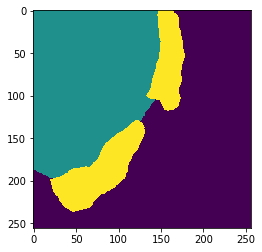

In [5]:
plt.imshow(masks[24])

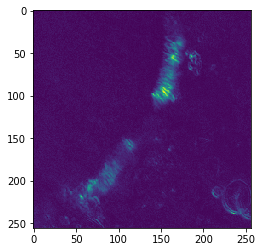

In [6]:
plt.imshow(dat[24,:,:,0])

In [7]:
masks_channels = np.zeros((masks.shape+(3,)))
masks_channels[masks == 0,0]=1
masks_channels[masks == 1,1]=1
masks_channels[masks == 2,2]=1

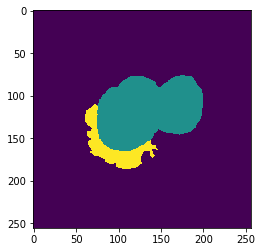

In [8]:
plt.imshow(masks[5])

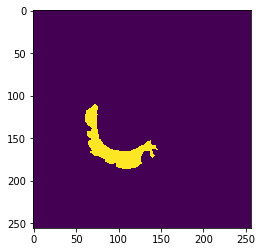

In [9]:
plt.imshow(masks_channels[5,:,:,2])

In [10]:
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
masks_channels[1:5,:,:,:].shape, dat[1:5,:,:,:].shape

((4, 256, 256, 3), (4, 256, 256, 1))

In [12]:
model.fit(dat[1:5,:,:,:],masks_channels[1:5,:,:,:])

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
4/4 [==============================] - 15s 4s/step - loss: 0.7524 - acc: 0.5661


In [13]:
dat[6:7,:,:,:].shape

(1, 256, 256, 1)

In [14]:
np.array([np.expand_dims(dat,axis = 2)])[0][:,:,0].shape

(73, 256, 256, 1)

In [15]:
outt = model.predict(dat[7:8,:,:,:])

In [16]:
outt.shape

(1, 256, 256, 3)

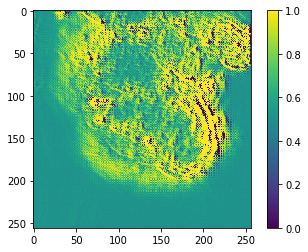

In [26]:
plt.imshow(outt[0,:,:,2])
plt.colorbar()

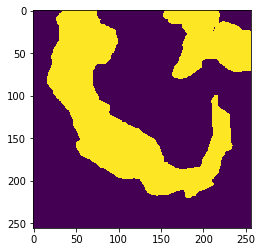

In [27]:
plt.imshow(masks_channels[7,:,:,2])

In [ ]:
np.min(outt)

In [ ]:
outtt = np.copy(outt[0,:,:,0])

In [ ]:
outtt[outtt >= .7] = 1
outtt[outtt < .7] = 0

In [ ]:
plt.imshow(outtt)

In [ ]:
mask_channels = np.zeros((256,256,3))
mask_channels[dat_m == 0,0]=1
mask_channels[dat_m == 1,1]=1
mask_channels[dat_m == 2,2]=1
mask_channels

In [ ]:
outt.shape

In [ ]:
plt.imshow(outt[0,:,:,2])
plt.colorbar()

In [ ]:
plt.imshow(np.argmax(outt[0,:,:],axis=2))

In [ ]:
plt.imshow(dat_m)
plt.colorbar()

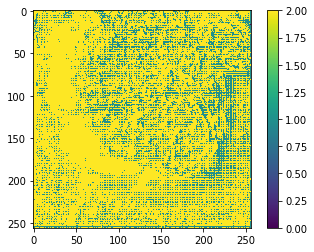

In [28]:
plt.imshow(outt.argmax(axis=-1)[0])
plt.colorbar()

In [33]:
two_pred = outt.argmax(axis= -1)[0] == 2
two_mask = masks_channels[7,:,:,2] == 1

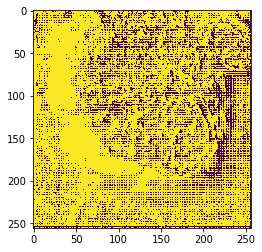

In [34]:
plt.imshow(two_pred)

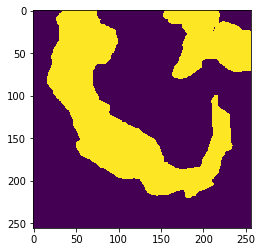

In [35]:
plt.imshow(two_mask)

In [ ]:
overlap = two*component2 # Logical AND
union = component1 + component2 # Logical OR

IOU = overlap.sum()/float(union.sum())